In [2]:
# Daten Einlesen
import pandas as pd
filename1 = 'XMOVERScore_FinalBench.csv'


data = pd.read_csv(filename1)



bert = data.iloc[0:7]
distilbert = data.iloc[7:14]
xlmr = data.iloc[14:21]
tiny = data.iloc[21:]


models_df = [bert, distilbert, xlmr, tiny]
print("Tiny-VErsions")
for mod in models_df:
    print(mod)

Tiny-VErsions
      LP  Score       Time    Memory  LM_Score   LM_Time  LM_Usage
0  cs-en  0.235  15.855671  3.558393     0.442  9.398126  0.964480
1  de-en  0.395  13.523358  2.286151     0.485  9.307220  0.877646
2  fi-en  0.337  13.095006  2.195590     0.622  9.155854  0.491279
3  lv-en  0.222  14.211346  3.180200     0.591  7.273632  0.303442
4  ru-en  0.342  15.529096  2.705046     0.491  9.320954  0.264931
5  tr-en  0.341  14.867953  3.258908     0.474  9.124849  0.227061
6  zh-en  0.369  16.058394  2.547295     0.456  9.213624  0.818694
       LP  Score       Time    Memory  LM_Score   LM_Time  LM_Usage
7   cs-en  0.058  11.825575  3.475181     0.391  9.347923  0.781649
8   de-en  0.291  10.474583  2.264133     0.454  9.315544  0.711144
9   fi-en  0.134  10.293857  2.184611     0.586  9.161947  0.332957
10  lv-en -0.049  11.559869  3.173271     0.539  7.214934  0.248930
11  ru-en  0.209  12.320973  2.701613     0.444  9.189983  0.264907
12  tr-en  0.081  11.502283  3.258275     

In [3]:
# Aufbereitung
dist = distilbert.copy()
xlm= xlmr.copy()
tiny = tiny.copy()

for col in range(1,xlm.shape[1]):
    for row in range(xlm.shape[0]):
        xlm.iloc[row, col] =  abs(xlm.iloc[row, col].copy() / bert.iloc[row, col].copy())
        dist.iloc[row, col] = abs(dist.iloc[row, col].copy() / bert.iloc[row, col].copy())
        tiny.iloc[row, col] =  abs(tiny.iloc[row, col].copy() / bert.iloc[row, col].copy())
models=[dist,xlm,tiny]
print(dist)
print(xlm)
print(tiny)

       LP     Score      Time    Memory  LM_Score   LM_Time  LM_Usage
7   cs-en  0.246809  0.745826  0.976615  0.884615  0.994658  0.810436
8   de-en  0.736709  0.774555  0.990369  0.936082  1.000894  0.810286
9   fi-en  0.397626  0.786090  0.995000  0.942122  1.000665  0.677735
10  lv-en  0.220721  0.813425  0.997821  0.912014  0.991930  0.820354
11  ru-en  0.611111  0.793412  0.998731  0.904277  0.985949  0.999909
12  tr-en  0.237537  0.773629  0.999806  0.873418  1.004582  1.000846
13  zh-en  0.818428  0.788071  0.998960  0.925439  1.004892  1.000029
       LP     Score      Time    Memory  LM_Score   LM_Time  LM_Usage
14  cs-en  2.221277  0.847317  0.876591  1.244344  0.995723  0.810021
15  de-en  1.491139  0.962751  1.143668  1.208247  1.006472  0.810195
16  fi-en  2.068249  0.844611  0.949773  1.151125  1.010001  0.677572
17  lv-en  2.747748  0.803834  0.808271  1.165821  0.993248  0.820091
18  ru-en  1.871345  0.868476  0.946749  1.323829  1.002949  1.000000
19  tr-en  1.868035 

In [9]:
import plotly.graph_objects as go
import plotly.io as pio

modelle = models_df
lang = ['cs', 'de', 'fi' , 'lv', 'ru', 'tr', 'zh']
columm ='Score'
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r= modelle[0][columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='mBERT'
))
fig.add_trace(go.Scatterpolar(
      r=  modelle[2][columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='XLM-RoBERTa'
))
fig.add_trace(go.Scatterpolar(
      r= modelle[1][columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='DistilBERT'
))
fig.add_trace(go.Scatterpolar(
      r= modelle[3][columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='TinyBERT'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True,
        title = "Model Score"
)
pio.write_image(fig,'images/ModelScore.png' , format='png')
fig.show()


In [10]:
import plotly.graph_objects as go
lang = ['cs', 'de', 'fi' , 'lv', 'ru', 'tr', 'zh']
columm ='LM_Score'
modelle = models_df
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r= modelle[0][columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='mBERT'
))
fig.add_trace(go.Scatterpolar(
      r=  modelle[2][columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='XLM-RoBERTa'
))
fig.add_trace(go.Scatterpolar(
      r= modelle[1][columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='DistilBERT'
))
fig.add_trace(go.Scatterpolar(
      r= modelle[3][columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='TinyBERT'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True,
    title = "Model + LM(GP2) for remapping score"
)
pio.write_image(fig,'images/ModelLMScore.png' , format='png')
fig.show()

[0 1 2 3 4 5 6]
[0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1]
[0.2, 1.2000000000000002, 2.2, 3.2, 4.199999999999999, 5.199999999999999, 6.199999999999999]
[0.30000000000000004, 1.3000000000000003, 2.3000000000000003, 3.3000000000000003, 4.299999999999999, 5.299999999999999, 6.299999999999999]


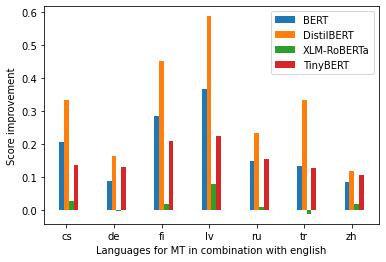

"\nfor mod in modelle:\n    print(mod)\n    print(mod['Score'].to_numpy())\n    print(mod['LM_Score'].to_numpy())\n\n    diff = mod['LM_Score'].to_numpy() - mod['Score'].to_numpy()\n    modelle.append((diff))\n    print(diff)\n\nfor plts in range(len(modelle_diff)):\n    plt.figure(figsize=(9, 3))\n    plt.bar(langs, modelle[plt])\n    plt.suptitle('Differences in  ',str(performance_models[plts]))\n    plt.legend()\n    plt.show()\n"

In [68]:
import matplotlib.pyplot as plt
import numpy as np
 # ###    Show increasement for LM
modelle_diff=[]
langs = ['cs', 'de', 'fi' , 'lv', 'ru', 'tr', 'zh']
performance_models = ['BERT','DistilBERT','XLM-RoBERTa', 'TinyBERT']


for i in range(4):
    scor = modelle[i]['Score'].to_numpy()
    scor_lm = modelle[i]['LM_Score'].to_numpy()

    diff = scor_lm - scor
    modelle_diff.append(diff)


bar_width = 0.1
x = langs
#negative_data = [-1,-4,-3,-2,-6,-2,-8]
positive_data = modelle_diff[0]

'''
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(x, positive_data, width=1, color='b')
'''
hatches = [ "*","x", "o", "O" ]

x = np.arange(7)

x1 = [a + bar_width for a in x]
x2 = [a + bar_width for a in x1]
x3 = [a + bar_width for a in x2]
xs = [x, x1, x2, x3]

for i in range(4):
    print(xs[i])
    plt.bar(xs[i], modelle_diff[i], width= bar_width, label= performance_models[i] )

plt.xticks([r + bar_width for r in range(len(langs))], langs)
plt.ylabel('Score improvement')
plt.xlabel('Languages for MT in combination with english')
plt.legend()
plt.savefig('images/XMover_MT-improvement.png')

plt.show()


'''
for mod in modelle:
    print(mod)
    print(mod['Score'].to_numpy())
    print(mod['LM_Score'].to_numpy())

    diff = mod['LM_Score'].to_numpy() - mod['Score'].to_numpy()
    modelle.append((diff))
    print(diff)

for plts in range(len(modelle_diff)):
    plt.figure(figsize=(9, 3))
    plt.bar(langs, modelle[plt])
    plt.suptitle('Differences in  ',str(performance_models[plts]))
    plt.legend()
    plt.show()
'''

In [ ]:
# For Scores
import matplotlib.pyplot as plt
# Summaraize scores
performance_models = ['BERT','XLM-RoBERTa', 'DistilBERT', 'TinyBERT']
performance_scores = [1, 0, 0, 0]
performance_lmscores= [1, 0, 0, 0]

for i in range(len(performance_scores)-1):
    for j in range(7):
        performance_scores[i+1] = performance_scores[i+1] + models[i].iloc[j,1]
        performance_lmscores[i+1] = performance_lmscores[i+1] + models[i].iloc[j,4]

    performance_scores[i+1] = performance_scores[i+1] / 7
    performance_lmscores[i+1] = performance_lmscores[i+1] / 7

plt.figure(figsize=(9, 3))
plt.subplot(121)
plt.bar(performance_models, performance_scores)
plt.subplot(122)
plt.bar(performance_models, performance_lmscores)
plt.suptitle('Scores ')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# Summaraize scores
performance_models = ['BERT','XLM-RoBERTa', 'DistilBERT', 'TinyBERT']
performance_scores = [1, 0, 0, 0]
performance_lmscores= [1, 0, 0, 0]

for i in range(len(performance_scores)-1):
    for j in range(7):
        performance_scores[i+1] = performance_scores[i+1] + models[i].iloc[j,1]
        performance_lmscores[i+1] = performance_lmscores[i+1] + models[i].iloc[j,4]

    performance_scores[i+1] = performance_scores[i+1] / 7
    performance_lmscores[i+1] = performance_lmscores[i+1] / 7

plt.figure(figsize=(9, 3))
plt.subplot(121)
plt.bar(performance_models, performance_scores)
plt.subplot(122)
plt.bar(performance_models, performance_lmscores)
plt.suptitle('Scores ')
plt.legend()
plt.show()

In [ ]:
performance_models = ['BERT','XLM-RoBERTa', 'DistilBERT', 'TinyBERT']
performance_time = [1, 0, 0, 0]
performance_lmtime= [1, 0, 0, 0]
performance_usage= [1, 0, 0, 0]
performance_lmusage= [1, 0, 0, 0]


for i in range(len(performance_scores)-1):
    for j in range(7):
        performance_time[i+1] = performance_time[i+1] + models[i].iloc[j,1]
        performance_lmtime[i+1] = performance_lmtime[i+1] + models[i].iloc[j,4]

    performance_time[i+1] = performance_time[i+1] / 7
    performance_lmtime[i+1] = performance_lmtime[i+1] / 7

def Avg_values(model, feature):
    perf = [1, 0, 0, 0]
    for i in range(len(perf)-1):
        for j in range(7):
            perf[i+1] = perf[i+1] + models[i].iloc[j,feature]
        perf[i+1] = perf[i+1] / 7
    return perf
print(Avg_values(1,4))





plt.figure(figsize=(9, 3))
plt.subplot(121)
plt.bar(performance_models, performance_scores)
plt.subplot(122)
plt.bar(performance_models, performance_lmscores)
plt.suptitle('Scores ')
plt.legend()
plt.show()




